# Getting Data from TWITTER 

- https://www.twitter.com/leehsienloong
- https://www.twitter.com/STcom
- https://www.twitter.com/stompsingapore

# Getting Twitter API keys

In order to access Twitter Streaming API, we need to get 4 pieces of information from Twitter: API key, API secret, Access token and Access token secret. Follow the steps below to get all 4 elements:

- Create a Twitter account if you do not already have one.
- Go to https://apps.twitter.com/ and log in with your Twitter credentials.
- Click **Create New App**
- Fill out the form, agree to the terms, and click **Create your Twitter application**
- In the next page, click on **API keys** tab, and copy your **API key** and **API secret**.
- Scroll down and click **Create my access token**, and copy your **Access token** and **Access token secret**.


# Connecting to Twitter Streaming API and Download Data using `Tweepy`

We will be using a Python library called **Tweepy** to connect to **Twitter Streaming API** and downloading the data. If you don't have Tweepy installed in your machine, go to this link ([github.com/tweepy/tweepy](https://github.com/tweepy/tweepy)), and follow the installation instructions.

To install, simply launch **Terminal** and type:
- pip install tweepy 
- **[or]** sudo pip install tweepy 

In [0]:
# Variables that contains the user credentials to access Twitter API 
access_token = '820512461870612480-fFnHWvWscwO34I42XCl5MxHqa0sGfSR'     # PLEASE USE YOUR OWN
access_token_secret = 's4BBHmIbRFR1UR8JLiIoP166jvfKaKAoK1c07lthUElE6'   # PLEASE USE YOUR OWN
consumer_key = '4s7i2W2ixaIHSbiVTrx5CLd6B'                              # PLEASE USE YOUR OWN
consumer_secret = '96yhhyxzFDharTYFQdkcdQFSK9S63ggMMQ4ft8cCNVr3nHyYEV'  # PLEASE USE YOUR OWN

In [0]:
!pip install tweepy

    100% |████████████████████████████████| 286kB 12.3MB/s 
  Running setup.py bdist_wheel for PySocks ... - done
  Stored in directory: /root/.cache/pip/wheels/22/5c/b5/12e0dfdfa85bea67b23628b6425fae715c687e947a45ee3df9
Successfully built PySocks


# Twitter Search

In [0]:
import tweepy
from tweepy import OAuthHandler

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [0]:
results = api.search(q='obama', count=50, lang='en')

In [0]:
# Convert a result to JSON with "._json"
print(type(results[0]))
print(type(results[0]._json))

<class 'tweepy.models.Status'>
<class 'dict'>


In [0]:
# Convert all the results into a `list of dictionaries`
list_of_status_dicts = []

for result in results:
    list_of_status_dicts.append( result._json )

In [0]:
# This code is the same as the code in the cell above, just that it's shorter.
# [Python list comprehension] Convert all the results into a `list of dictionaries`
list_of_status_dicts = [result._json for result in results]

In [0]:
len(list_of_status_dicts)

50

In [0]:
list_of_status_dicts[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [0]:
list_of_status_dicts[0]['text']

"RT @LouDobbs: No collusion, so why doesn't Mueller's witch hunt target Obama administration crimes? https://t.co/v2OlTd8Lm4 #FoxNews #MAGA…"

# Twitter Search (Advance)

In [0]:
query = 'trump'
max_tweets = 555

searched_tweets = []
last_id = -1
while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        new_tweets = api.search(q=query, lang='en', count=count, max_id=str(last_id - 1))
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        # Depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
        break

In [0]:
len(searched_tweets)

555

In [0]:
# Convert all the results into a `list of dictionaries`
list_of_status_dicts_2 = [x._json for x in searched_tweets]

In [0]:
len(list_of_status_dicts_2)

555

In [0]:
list_of_status_dicts_2[0]['text']

"If you don't mind your Congressmen, your Senators, and/or favorite celebrities paying hush money, then why are you… https://t.co/m4TdVwQedu"

# Twitter Streaming

The Streaming APIs give developers low latency access to Twitter’s global stream of Tweet data. A proper implementation of a streaming client will be pushed messages indicating Tweets and other events have occurred, without any of the overhead associated with polling a REST endpoint.

More info: https://dev.twitter.com/streaming/overview

In [0]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/BT4222/twitter_streaming_data'

In [0]:
import os
from datetime import datetime
import json
import random
import re
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

# This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, json_data):
        # print(json_data)
        filename = re.sub(r'\s|\/|:', r'_', '%s.txt' % str(datetime.now()))
        # fileloc = './twitter_stream_data/' + filename
        fileloc = os.path.join(path, filename)
  
        # 1% chance of printing out the file location
        if random.randint(0, 100) == 0:
            print(fileloc)
        # End of if statement.
            
        with open(fileloc, 'w') as f:
            f.write(json_data)
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    # This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    # This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
    stream.filter(track=['obama', 'trump', 'clinton'])

"""
Note that this is a while loop! It runs until the cows come home!
To terminate this infinite loop, press the stop button in the iPython notebook's TOOLBAR.

You will see a "KeyboardInterrupt" error message -- which is what you are supposed to get.
"""

/content/drive/My Drive/BT4222/twitter_data/2018-12-11_12_18_07.528406.txt
/content/drive/My Drive/BT4222/twitter_data/2018-12-11_12_18_07.557475.txt
/content/drive/My Drive/BT4222/twitter_data/2018-12-11_12_18_08.070762.txt
/content/drive/My Drive/BT4222/twitter_data/2018-12-11_12_18_15.466361.txt
/content/drive/My Drive/BT4222/twitter_data/2018-12-11_12_18_17.827804.txt
/content/drive/My Drive/BT4222/twitter_data/2018-12-11_12_18_19.606082.txt
/content/drive/My Drive/BT4222/twitter_data/2018-12-11_12_18_21.670556.txt
/content/drive/My Drive/BT4222/twitter_data/2018-12-11_12_18_23.409905.txt
/content/drive/My Drive/BT4222/twitter_data/2018-12-11_12_18_33.074334.txt
/content/drive/My Drive/BT4222/twitter_data/2018-12-11_12_18_37.732346.txt
/content/drive/My Drive/BT4222/twitter_data/2018-12-11_12_18_38.750234.txt
/content/drive/My Drive/BT4222/twitter_data/2018-12-11_12_18_42.419748.txt
/content/drive/My Drive/BT4222/twitter_data/2018-12-11_12_18_42.923056.txt
/content/drive/My Drive/B

### You should see the files in the `twitter_stream_data` folder

![](./images/twitter_stream_data_folder.png)

# Reading Tweets

In [0]:
import glob
# list_of_files = (glob.glob("./twitter_stream_data/*.txt"))
list_of_files = (glob.glob("/content/drive/My Drive/BT4222/twitter_data/*txt"))
len(list_of_files)

In [0]:
# Read all the TXT files into a "list of dictionary objects" called "tweets_data"

tweets_data = []

for fname in list_of_files:
    tweets_file = open(fname, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

We can print the number of tweets using the command below.

In [0]:
len(tweets_data)

475

In [0]:
tweets_data[0]['text']

'RT @LeakDump: Only one week left until President Trump. Buckle up - Los Angeles Times -  https://t.co/EyPEb9tOjs https://t.co/TeWFBixCKP'

Next, we will structure the tweets data into a pandas DataFrame to simplify the data manipulation. We will start by creating an empty DataFrame called tweets using the following command.

In [0]:
import pandas as pd
tweets = pd.DataFrame()

Next, we will add 3 columns to the tweets DataFrame called text, lang, and country. text column contains the tweet, lang column contains the language in which the tweet was written, and country the country from which the tweet was sent.

In [0]:
tweets['text'] = list(map(lambda tweet: tweet['text'] if 'text' in tweet else None, tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'] if 'lang' in tweet else None, tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if ('place' in tweet and (tweet['place'] != None)) else None, tweets_data))

Preview the **tweets** DataFrame

In [0]:
tweets.tail(10)

,text,lang,country
465,RT @ACLU: We’ve sued Joe Arpaio for denying wo...,en,None
466,Yes!!!!! https://t.co/OX2IMr2ZU5,und,United States
467,RT @attackerman: EXCLUSIVE: A senior NSC offic...,en,None
468,RT @CurlyHeadJackyy: But got the audacity to c...,en,None
469,RT @ProudResister: 3 Important Things I learne...,en,None
470,RT @Karencole2007: @TheRealJuIian @HillaryClin...,en,None
471,RT @AP: BREAKING: Congressional Democrats: As ...,en,None
472,RT @FAKEMELANlA: Lil Trump https://t.co/xVwdSr...,en,None
473,RT @PoliticalShort: U.S. District Judge Willia...,en,None
474,RT @MMFlint: WAIT! WHAT? Trump’s removing Flor...,en,None


In [0]:
tweets[  tweets['country'].notnull()  ].head()

,text,lang,country
35,leaked footage of trump rehearsing the swearin...,en,United States
57,It's still if you support Trump I can't suppor...,en,United States
223,@FoxNews @VP https://t.co/Fkjz3p0A2B,und,United States
299,"Are they dumb because they trust the media, or...",en,Nederland
368,@NYCRTweets https://t.co/Fkjz3p0A2B,und,United States


### Top 5 languages and Top 5 countries

Next, we will create 2 charts: The first one describing the Top 5 languages in which the tweets were written, and the second the Top 5 countries from which the tweets were sent.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

tweets_by_lang = tweets['lang'].value_counts()

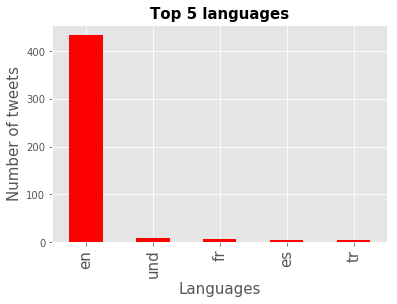

In [0]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

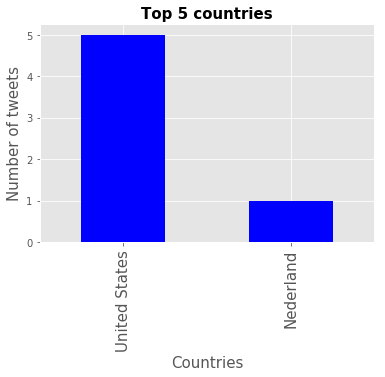

In [0]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

# Mining the Tweets

Our main goals in these text mining tasks are: compare the popularity of Obama, Trump and Clinton and to retrieve links. We will do the following steps:

- We will add tags to our tweets DataFrame in order to be able to manipualte the data easily.
- Extract links from tweets

First, we will create a function that checks if a specific keyword is present in a text. We will do this by using regular expressions. Python provides a library for regular expression called re. We will start by importing this library

In [0]:
import re

Next we will create a function called word_in_text(word, text). This function return True if a word is found in text, otherwise it returns False.

In [0]:
def word_in_text(word, text):
    if word and text:
        word = word.lower()
        text = text.lower()
        match = re.search(word, text)
        if match:
            return True
    return False

Next, we will add 3 columns to our tweets DataFrame.

In [0]:
tweets['obama'] = tweets['text'].apply(lambda tweet: word_in_text('obama', tweet))
tweets['trump'] = tweets['text'].apply(lambda tweet: word_in_text('trump', tweet))
tweets['clinton'] = tweets['text'].apply(lambda tweet: word_in_text('clinton', tweet))

The modified DataFrame looks like this.

In [0]:
tweets.head()

,text,lang,country,obama,trump,clinton
0,RT @LeakDump: Only one week left until Preside...,en,None,False,True,False
1,RT @TrumpRelease: Alec Baldwin's Donald Trump ...,en,None,False,True,False
2,RT @SupaSaiyanEEDEE: THINK.\nIf the Vice Presi...,en,None,False,False,False
3,RT @JoyAnnReid: Note that WN Bannon and Kushne...,en,None,False,False,False
4,RT @mattmfm: In their just released 2017 repor...,en,None,False,True,False


We can calculate the number of tweets for each person as follows:

In [0]:
print(tweets['obama'].value_counts()[True])
print(tweets['trump'].value_counts()[True])
print(tweets['clinton'].value_counts()[True])

32
294
18


We can make a simple comparaison chart by executing the following:

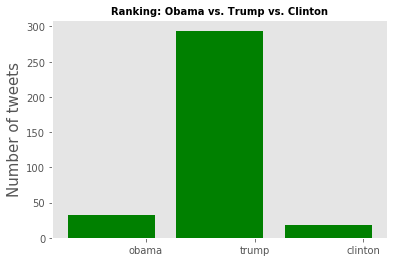

In [0]:
politicians = ['obama', 'trump', 'clinton']
tweets_by_politicians = [tweets['obama'].value_counts()[True], tweets['trump'].value_counts()[True], tweets['clinton'].value_counts()[True]]

x_pos = list(range(len(politicians)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_politicians, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: Obama vs. Trump vs. Clinton', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(politicians)
plt.grid()

# Extracting links from the tweets

Now, we want to retrieve links in the tweets. We will start by creating a function that uses regular expressions for retrieving link that start with **"http://"** or **"https://"** from a text. This function will return the url if found, otherwise it returns an empty string.

In [0]:
def extract_link(text):
    try:
        regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
        match = re.search(regex, text)
        if match:
            return match.group()
        return ''
    except:
        return ''

Next, we will add a column called link to our tweets DataFrame. This column will contain the urls information.

In [0]:
tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

The modified DataFrame looks like this.

In [0]:
tweets.head()

,text,lang,country,obama,trump,clinton,link
0,RT @LeakDump: Only one week left until Preside...,en,None,False,True,False,https://t.co/EyPEb9tOjs
1,RT @TrumpRelease: Alec Baldwin's Donald Trump ...,en,None,False,True,False,https://t.co/HkSM6hjeHO
2,RT @SupaSaiyanEEDEE: THINK.\nIf the Vice Presi...,en,None,False,False,False,
3,RT @JoyAnnReid: Note that WN Bannon and Kushne...,en,None,False,False,False,
4,RT @mattmfm: In their just released 2017 repor...,en,None,False,True,False,


In [0]:
tweets.shape

(475, 7)

Next, we will create a new DataFrame called **tweets_with_link**. 
This DataFrame is a subset of tweets DataFrame and contains all tweets that have a link.

In [0]:
tweets_with_link = tweets[ tweets['link'] != ''].copy()

In [0]:
tweets_with_link.head(3)

,text,lang,country,obama,trump,clinton,link
0,RT @LeakDump: Only one week left until Preside...,en,None,False,True,False,https://t.co/EyPEb9tOjs
1,RT @TrumpRelease: Alec Baldwin's Donald Trump ...,en,None,False,True,False,https://t.co/HkSM6hjeHO
7,I liked a @YouTube video from @markdice https:...,en,None,False,True,False,https://t.co/nOKnTA7Ch3


In [0]:
tweets_with_link.shape

(245, 7)

We can now print out all links for **obama**, **trump**, and **clinton** by executing the commands below:

In [0]:
print(tweets_with_link[tweets_with_link['obama']   == True]['link'])
print(tweets_with_link[tweets_with_link['trump']   == True]['link'])
print(tweets_with_link[tweets_with_link['clinton'] == True]['link'])

26     https://t.co/fNAy5Xwte2
40     https://t.co/ZsxNhYAuYk
84     https://t.co/NNRQoa11q2
86     https://t.co/JRkcr38pgu
160    https://t.co/CcqLk3jgyp
213         https://t.co/tcKU…
243    https://t.co/IyY0jnPXuZ
249    https://t.co/qRSvfM7w4p
335    https://t.co/IyY0jnPXuZ
361    https://t.co/IiACZ5TCCS
383    https://t.co/BAdanVTNv0
397              https://t.co…
408    https://t.co/tEZXlOSvbt
436    https://t.co/DM54OkPdtd
445    https://t.co/27umkCX41W
Name: link, dtype: object
0       https://t.co/EyPEb9tOjs
1       https://t.co/HkSM6hjeHO
7       https://t.co/nOKnTA7Ch3
8       https://t.co/HkSM6hjeHO
10      https://t.co/HkSM6hjeHO
12      https://t.co/HkSM6hjeHO
13      https://t.co/HkSM6hjeHO
14      https://t.co/L7N6LWU7cI
15      https://t.co/HkSM6hjeHO
17      https://t.co/pWHYgWIF4Q
24      https://t.co/LIF3d5LdNV
27      https://t.co/EyPEb9tOjs
30      https://t.co/HkSM6hjeHO
31      https://t.co/HkSM6hjeHO
34      https://t.co/HkSM6hjeHO
35      https://t.co/9ao7F04U

In [0]:
# Now say we want to read one of the links above, https://t.co/oua32nXu8W

# Read the HTML source of the URL: https://t.co/oua32nXu8W
import urllib.request
url = 'https://t.co/oua32nXu8W'
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
html = response.read()
try:
    html = html.decode('utf-8')
except:
    html = html.decode('unicode_escape')

# Import BeautifulSoup
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

In [0]:
# See the title of the HTML document

soup.title

<title>Man Charged for Threatening to Kill Trump Is Clinton 'Close Family Friend'</title>

In [0]:
# Extract all the paragraphs (p) and print out the content

for paragraph in soup.find_all('p'):
    if paragraph.string is not None:
        print(paragraph.string)

Photo by Wendy Maeda/The Boston Globe via Getty Images
The Florida man who was arrested on Tuesday for threatening the life of President-elect Donald Trump on Twitter is a close family friend of former President Bill Clinton and his wife, Hillary Clinton.
Hillary Clinton gave the eulogy of Puopolo's mother, Sonia, who died during the attack on the World Trade Center on September 11, 2001.
Clinton referred to him as "Dom Jr.'s latest computer wizardry" during the speech about his mother.
He has also given $20,000 to the Democratic National Committee.
Puopolo Jr. is currently being held without bail for a tweet where he said he was going to show up at the inauguration and assassinate the president-elect.
The tweet said, "This is the 16th of January 2017, I will be at the review/ inauguration and I will kill President Trump, President elect Trump today."
The family ties stretch from Puopolo Jr. to his sister, Sonia Tita Puopolo.
Hillary Rodman Clinton sits with the Puopolo family during a

# Conclusion

In this tutorial, we covered many techniques used in text mining. The code here can be:
1. modified to create a deeper analysis, or  
2. adapted to another use case. 

# References
- http://en.wikipedia.org/wiki/Text_mining
- http://en.wikipedia.org/wiki/Word-sense_disambiguation
- http://en.wikipedia.org/wiki/Regular_expression